In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000
data = pd.DataFrame({
    'EmployeeID': range(1, n+1),
    'Age': np.random.randint(22, 60, n),
    'Department': np.random.choice(['Sales', 'HR', 'IT', 'Finance', 'Operations'], n),
    'MonthlyIncome': np.random.randint(30000, 150000, n),
    'JobSatisfaction': np.random.randint(1, 5, n),
    'YearsAtCompany': np.random.randint(0, 20, n),
    'YearsSinceLastPromotion': np.random.randint(0, 10, n),
    'WorkLifeBalance': np.random.randint(1, 5, n),
    'Attrition': np.random.choice(['Yes', 'No'], n, p=[0.2, 0.8])
})

data.to_csv("hr_attrition_dataset.csv", index=False)
data.head()


,EmployeeID,Age,Department,MonthlyIncome,JobSatisfaction,YearsAtCompany,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,1,50,Operations,92711,4,1,4,1,No
1,2,36,Sales,71323,2,16,6,2,No
2,3,29,Operations,48752,4,3,0,1,No
3,4,42,Operations,127912,4,13,0,4,No
4,5,40,IT,112205,1,9,9,3,Yes


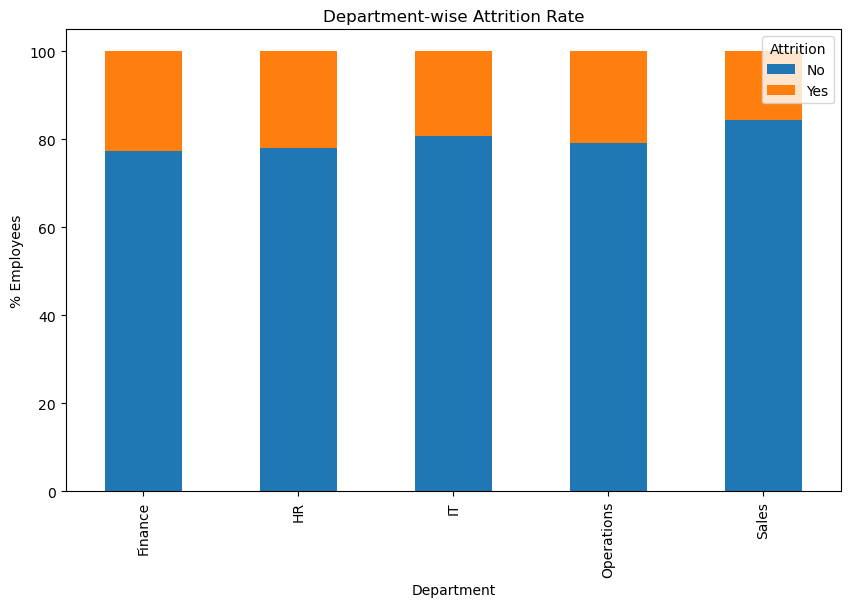

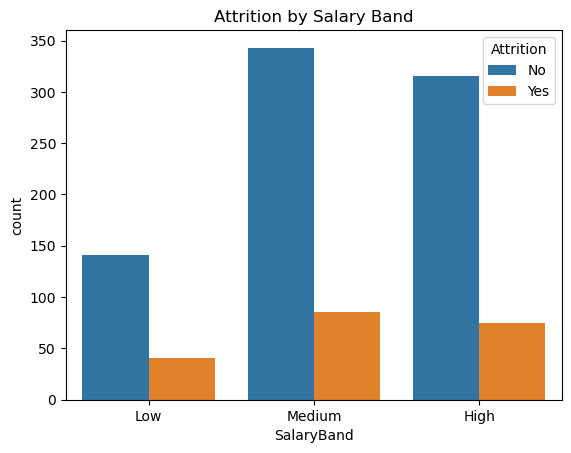

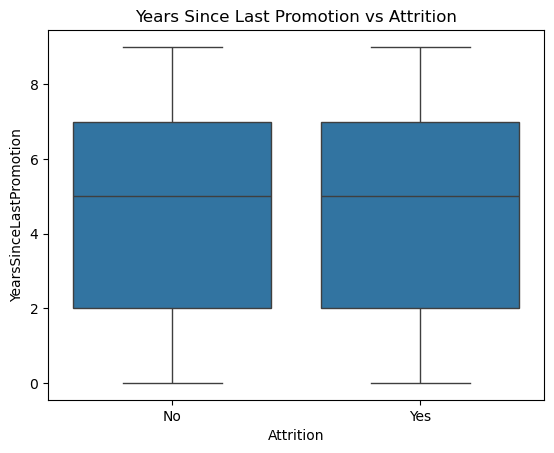

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Department-wise attrition
dept_attr = pd.crosstab(data['Department'], data['Attrition'], normalize='index') * 100
dept_attr.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Department-wise Attrition Rate')
plt.ylabel('% Employees')
plt.show()

# Salary band analysis
data['SalaryBand'] = pd.cut(data['MonthlyIncome'], bins=[0, 50000, 100000, 150000], labels=['Low', 'Medium', 'High'])
sns.countplot(x='SalaryBand', hue='Attrition', data=data)
plt.title('Attrition by Salary Band')
plt.show()

# Promotions & attrition
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)
plt.title('Years Since Last Promotion vs Attrition')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Preprocessing
df = data.copy()
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes = 1, No = 0
df = pd.get_dummies(df, drop_first=True)  # Encode categorical

X = df.drop(['EmployeeID', 'Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.18      0.29       159
           1       0.20      0.78      0.31        41

    accuracy                           0.30       200
   macro avg       0.48      0.48      0.30       200
weighted avg       0.64      0.30      0.29       200



In [4]:
data.to_csv("HR_Attrition_for_PBI.csv", index=False)

